#                                        EXPLORATORY DATA ANALYSIS COURSE PROJECT 

                                            WOMEN IN DATA SCIENCE [WIDS]
                                                     F1 BATCH 
                                                   TEAM NUMBER 06
                       
                ROLL NO                          NAME                                   USN 
                103                       MADHUSHRI PATIL                        01FE22BCI003                
                106                       VARSHA SAJJANAVAR                      01FE22BCI006
                121                       KHUSHI CHALGERI                        01FE22BCI023
                131                       BHOOMIKA MARIGOUDAR                    01FE22BCI035

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids-dataset/solution_template.csv
/kaggle/input/wids-dataset/train.csv
/kaggle/input/wids-dataset/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
warnings.filterwarnings("ignore", category=Warning)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# LOADING THE DATA :

In [3]:
soln = pd.read_csv('/kaggle/input/wids-dataset/solution_template.csv')
train =pd.read_csv('/kaggle/input/wids-dataset/train.csv')
test = pd.read_csv('/kaggle/input/wids-dataset/test.csv')

In [4]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.40,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.80,8.35,0.13,4.83,5.14,10.76,17.82,

In [5]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,12.46,6.04,18.49,36.35,52.51,7.45,9.19,5.21,88.75,6.44,0.

In [6]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.40,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.80,8.35,0.13,4.83,5.14,10.76,17.82,

In [7]:
#creating a copy to apply changes
df = train.copy()
X_test = test.copy()

In [8]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13173.000000,13168.000000,13173.000000,1.316800e+04,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13140.000000,13170.000000,13173.000000,13173.000000,13170.000000,13153.000000,13173.000000,13156.000000,13146.000000,13114.000000,13170.000000,13170.000000,13169.000000,13164.000000,13144.000000,12993.000000,13173.000000,13021.000000,13173.000000,13173.000000,13173.000000,13173.000000,13149.000000,13173.000000,13167.000000,13161.000000,13161.00000,13145.000000,13173.000000,13173.000000,13173.000000,13151.000000,13173.000000,13157.000000,13157.000000,13155.000000,13157.000000,13157.000000,13173.000000,13173.000000,13154.000000,13173.000000,13157.000000,13173.000000,13173.000000,13173.000000,13170.000000,13160.000000,13164.000000,13173.000000,13173.000000,13173.000000,13173.000000,13172.000000,13142.000000,13173.000000,13163.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB


In [10]:
df.shape

(13173, 152)

**CALCULATING THE MISSING DATA:**

In [11]:
# Missing values in visualized form
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(train)
missing_values.style.background_gradient(cmap='Reds')


The selected dataframe has 152 columns.
There are 72 columns that have missing values.


,Missing Values,% of Total Values
metastatic_first_novel_treatment,13162,99.900000
metastatic_first_novel_treatment_type,13162,99.900000
bmi,9071,68.900000
patient_race,6657,50.500000
payer_type,1765,13.400000
Average of Apr-14,180,1.400000
Average of Jun-14,152,1.200000
Average of Oct-13,59,0.400000
Average of Jul-18,46,0.300000
Average of Jan-13,33,0.300000


# VISUALIZING THE DATA :-

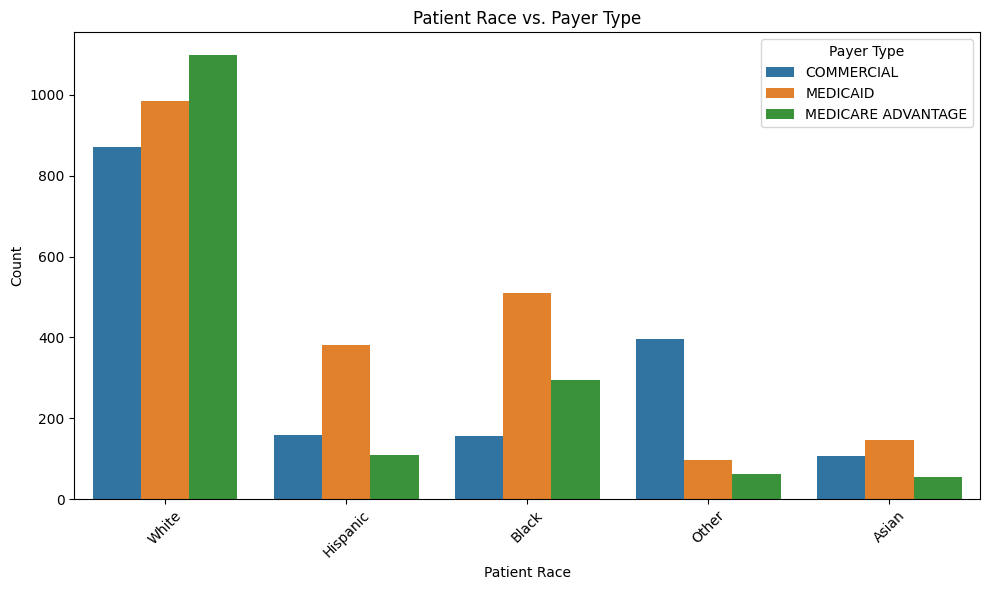

In [13]:
# Imputing Payer Type based on most bought by each Patient Race

plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x='patient_race', hue='payer_type')
plt.xlabel('Patient Race')
plt.ylabel('Count')
plt.title('Patient Race vs. Payer Type')
plt.xticks(rotation=45)
plt.legend(title='Payer Type')
plt.tight_layout()
plt.show()

In [14]:
frequent_payers = df.groupby(['patient_race', 'payer_type']).size().reset_index(name='count').sort_values(['patient_race', 'count'], ascending=False).groupby('patient_race').head(1)

In [15]:
frequent_payers

,patient_race,payer_type,count
14,White,MEDICARE ADVANTAGE,1100
9,Other,COMMERCIAL,395
7,Hispanic,MEDICAID,382
4,Black,MEDICAID,509
1,Asian,MEDICAID,145


In [16]:
# Imputing payers with the most frequent payers 

# Creating  a dictionary of patient race with most frequent_payers
dict_race_payer = dict(zip(frequent_payers['patient_race'],frequent_payers['payer_type']))
df['payer_type'] = df.apply(lambda x: dict_race_payer.get(x['patient_race'], x['payer_type']), axis=1)

In [17]:
df['payer_type'].isna().sum()


673

In [18]:
# Dropping the columns in both train and test set

df.drop(['metastatic_first_novel_treatment',
'metastatic_first_novel_treatment_type',
'bmi',
'patient_race'], axis =1 , inplace = True)

X_test.drop(['metastatic_first_novel_treatment',
'metastatic_first_novel_treatment_type',
'bmi',
'patient_race'], axis =1 , inplace = True)

In [19]:
# Here are the object type in data column that needed to be encoded
obj_dtypes = df.dtypes[df.dtypes == 'object']
obj_dtypes

payer_type                          object
patient_state                       object
Region                              object
Division                            object
patient_gender                      object
breast_cancer_diagnosis_code        object
breast_cancer_diagnosis_desc        object
metastatic_cancer_diagnosis_code    object
dtype: object

In [20]:
# Finding columns with null value
nam_cols = df.columns[df.isna().sum() > 0].tolist()

In [21]:
nam_cols

['payer_type',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'home_value',
 'rent_median',
 'rent_burden',
 'self_employed',
 'farmer',
 'poverty',
 'limited_english',
 'Average of Jan-13',
 'Average of Feb-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of Jun-14',
 'Average of Nov-14',
 'Average of Jan-15',
 'Average of Feb-15',
 'Average of Mar-15',
 'Average of Apr-15',
 'Average 

In [22]:
for column in nam_cols:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        print(f"Column {column} is not numeric and cannot be filled with mean.")
        
    if pd.api.types.is_numeric_dtype(X_test[column]):
        X_test[column].fillna(X_test[column].mean(), inplace=True)
    else:
        print(f"Column {column} in X_test is not numeric and cannot be filled with mean.")


Column payer_type is not numeric and cannot be filled with mean.
Column payer_type in X_test is not numeric and cannot be filled with mean.


In [22]:
for column in nam_cols:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
        
    if pd.api.types.is_numeric_dtype(X_test[column]):
        X_test[column].fillna(X_test[column].mean(), inplace=True)
    else:
        X_test[column].fillna(X_test[column].mode()[0], inplace=True)


In [23]:
# checking null values presence after imputation of mean
print(df.columns[df.isna().sum() > 0])
print(X_test.columns[X_test.isna().sum()>0])

Index([], dtype='object')
Index([], dtype='object')


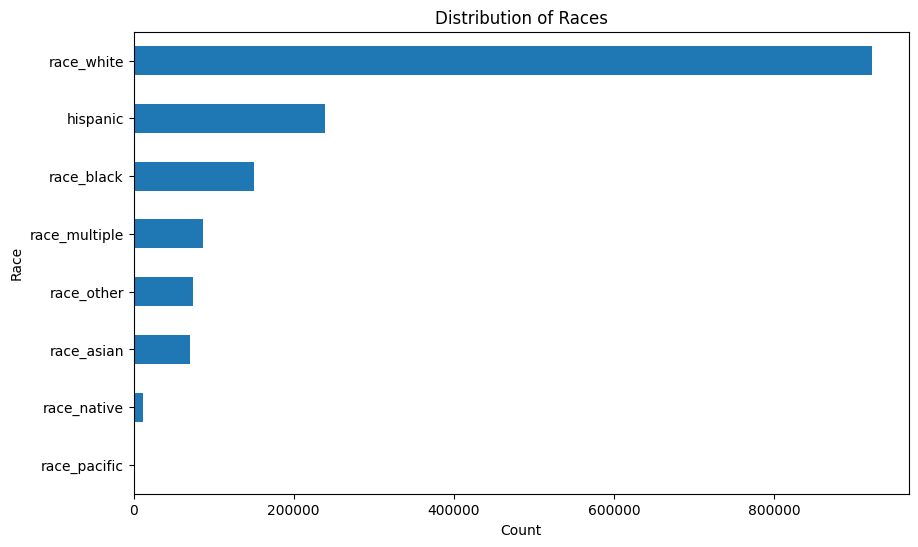

In [25]:
race_counts = df[['race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic']].sum()
plt.figure(figsize=(10, 6))
race_counts.sort_values().plot(kind='barh')
plt.title('Distribution of Races')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

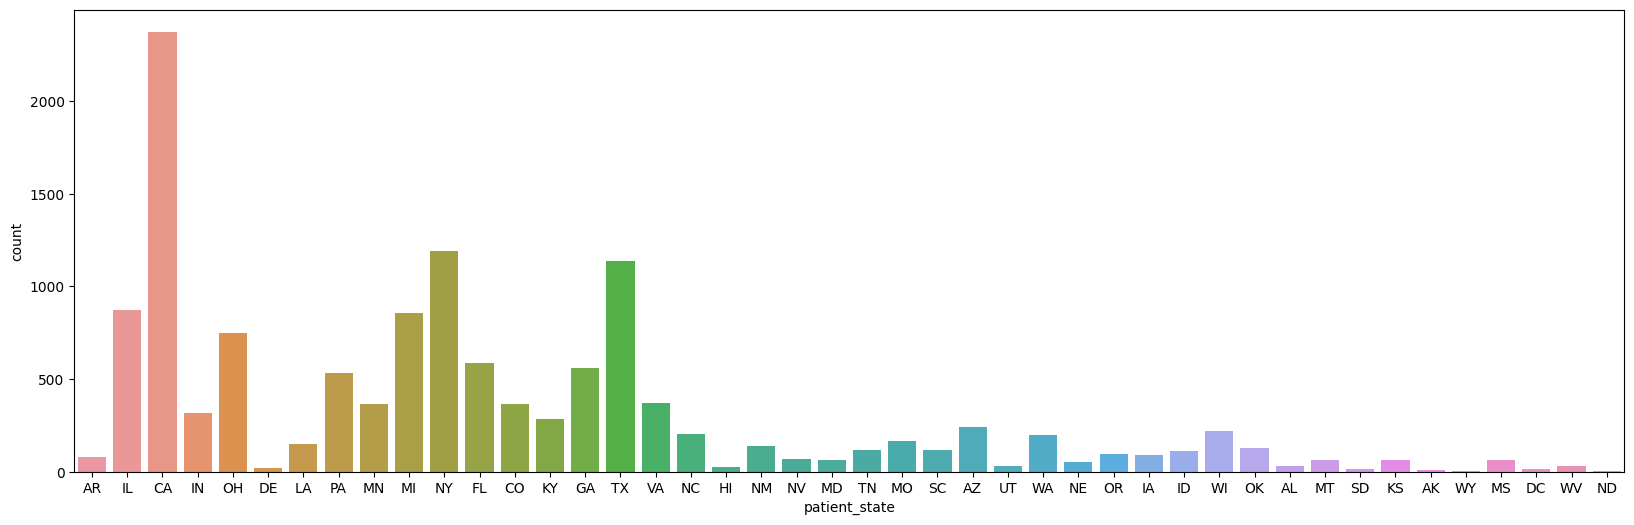

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.countplot(x='patient_state', data=df)
plt.show()

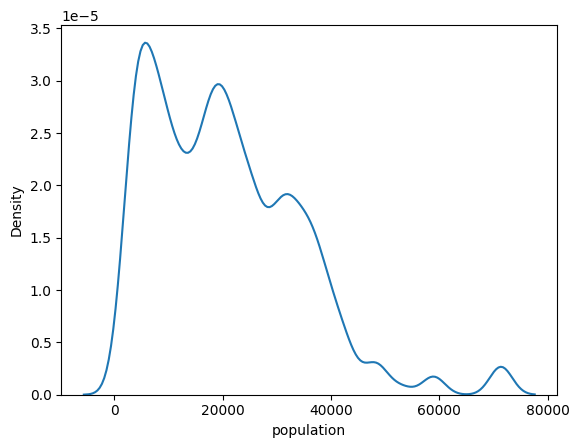

In [28]:
import seaborn as sns
graph = sns.kdeplot(x=df['population'])
plt.show()


<Axes: xlabel='payer_type', ylabel='count'>

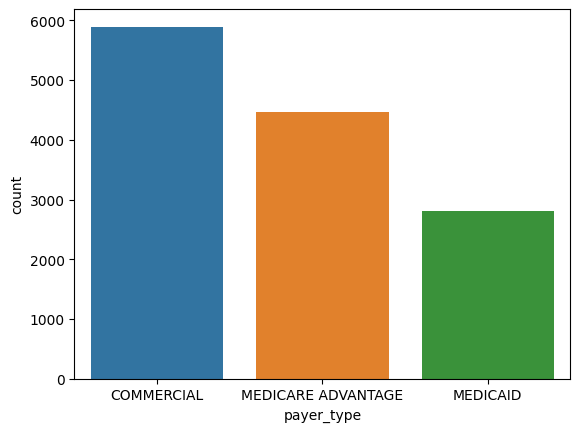

In [30]:
import seaborn as sns

sns.countplot(x=df["payer_type"])

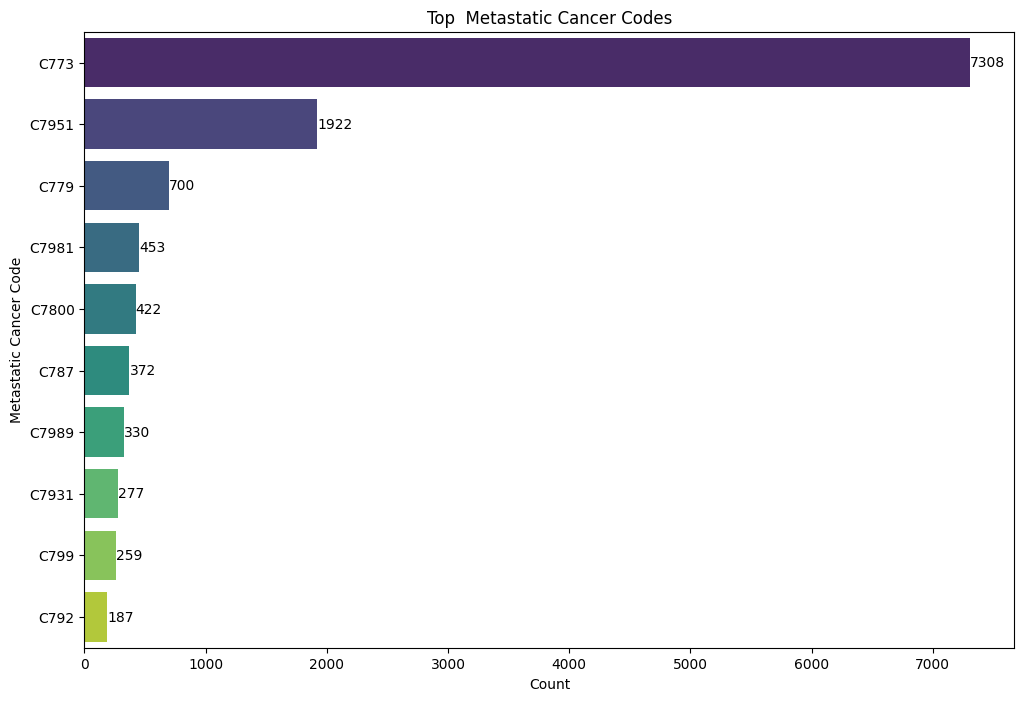

In [31]:
# Count occurrences of each metastatic cancer code
code_counts = df['metastatic_cancer_diagnosis_code'].value_counts().head(10)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=code_counts.values, y=code_counts.index, palette='viridis')
for i, v in enumerate(code_counts.values):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.title('Top  Metastatic Cancer Codes')
plt.xlabel('Count')
plt.ylabel('Metastatic Cancer Code')
plt.show()

In [32]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [33]:
# Iterating from each month to get average temperature in train as well as test data
for i in month:
    cols = [col for col in df.columns if col.startswith(f'Average of {i}')]
    df[f'Average of {i}'] = df[cols].sum(axis = 1)/len(cols)
    X_test[f'Average of {i}'] = X_test[cols].sum(axis = 1)/len(cols)
    df.drop(cols,axis = 1, inplace = True) # droping those columns whose average are taken above
    X_test.drop(cols,axis =1, inplace = True)

In [34]:
df.columns

Index(['patient_id', 'payer_type', 'patient_state', 'patient_zip3', 'Region',
       'Division', 'patient_age', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'population', 'density',
       'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male',
       'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership

In [35]:
X_test.columns

Index(['patient_id', 'payer_type', 'patient_state', 'patient_zip3', 'Region',
       'Division', 'patient_age', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'population', 'density',
       'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male',
       'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership

In [36]:
# Selecting the columns with object dtypes for encoding
cols = df.columns[df.dtypes == 'object']

In [37]:
cols

Index(['payer_type', 'patient_state', 'Region', 'Division', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code'],
      dtype='object')

In [38]:
#Dropping description column as we will not using it
df.drop(['breast_cancer_diagnosis_desc'],axis = 1 ,inplace = True)
X_test.drop(['breast_cancer_diagnosis_desc'],axis = 1 ,inplace = True)

**TARGET ENCODING :**

In [39]:
# combining training and testing data
combined_df = pd.concat([df, X_test], axis=0)

cols = ['payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']

# Target Encoder
TE = TargetEncoder()
combined_df[cols] = TE.fit_transform(combined_df[cols],combined_df['metastatic_diagnosis_period'])

In [40]:
X_train_te = combined_df.iloc[:len(df)]
X_test_te = combined_df.iloc[len(df):]

# Checking shape after encoding
print("Shape of encoded_train:", X_train_te.shape)
print("Shape of encoded_test:", X_test_te.shape)

Shape of encoded_train: (13173, 87)
Shape of encoded_test: (5646, 87)


In [41]:
X_train_te = X_train_te.drop(['metastatic_diagnosis_period'],axis =1)
y_train_te =  df['metastatic_diagnosis_period']

k = 24
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train_te,y_train_te)

# indices of the selected features
selected_feature_indices = chi2_selector.get_support(indices=True)
selected_features = X_train_te.columns[selected_feature_indices]
print("Selected features:", selected_features)

Selected features: Index(['patient_id', 'patient_zip3', 'breast_cancer_diagnosis_code',
       'population', 'density', 'income_household_median',
       'income_household_150_over', 'income_individual_median',
       'housing_units', 'home_value', 'rent_median',
       'education_college_or_above', 'farmer', 'race_white', 'race_black',
       'race_asian', 'race_native', 'race_other', 'hispanic',
       'limited_english', 'Average of Jan', 'Average of Feb', 'Average of Mar',
       'Average of Dec'],
      dtype='object')


<Axes: >

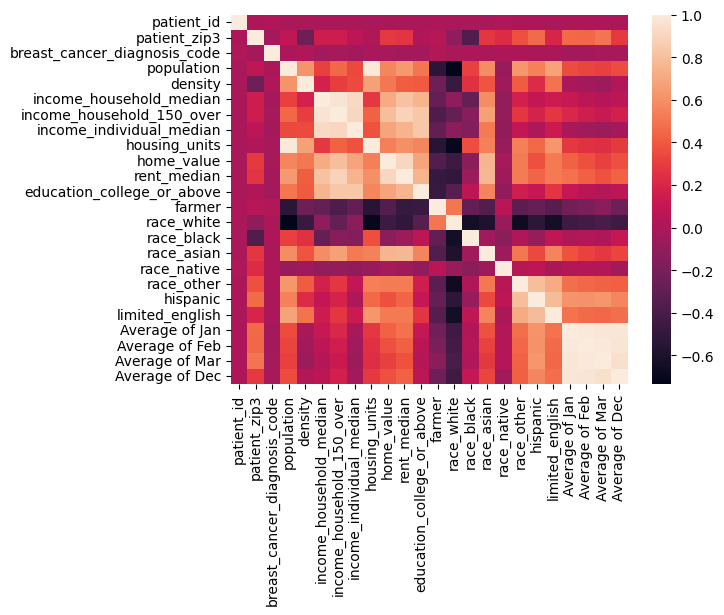

In [42]:
sns.heatmap(X_train_te[selected_features].corr())

In [43]:
selected_features = selected_features.to_list()

# FEATURE SELECTION :

In [44]:
# Before splitting the columns lets add those columns in selected features which show relevancy to metastic cancer
selected_features.remove('patient_id')

In [45]:
selected_features.append('payer_type')
selected_features.append('patient_age')
selected_features.append('metastatic_cancer_diagnosis_code')


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_te[selected_features],y_train_te,random_state = 100, test_size = 0.2)
print(f"Training size: {X_train.shape} , Testing Size : {X_test.shape}")

Training size: (10538, 26) , Testing Size : (2635, 26)


In [49]:
cols = ['payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']
#df.drop(['breast_cancer_diagnosis_desc'], axis=1, inplace=True)
#X_test.drop(['breast_cancer_diagnosis_desc'], axis=1, inplace=True)
cols

['payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_gender',
 'breast_cancer_diagnosis_code',
 'metastatic_cancer_diagnosis_code']

In [50]:
# Combining training and testing data for encoding
combined_df = pd.concat([df, X_test], axis=0)
TE = TargetEncoder()
combined_df[cols] = TE.fit_transform(combined_df[cols], combined_df['metastatic_diagnosis_period'])
X_train_te = combined_df.iloc[:len(df)]
X_test_te = combined_df.iloc[len(df):]

In [51]:
# Dropping target variable from training data
X_train_te = X_train_te.drop(['metastatic_diagnosis_period'], axis=1)
y_train_te = df['metastatic_diagnosis_period']

In [52]:
# Feature selection
k = 24
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train_te, y_train_te)

In [54]:
# Selected feature columns
selected_feature_indices = chi2_selector.get_support(indices=True)
selected_features = X_train_te.columns[selected_feature_indices].tolist()
selected_features.remove('patient_id')
selected_features.extend(['payer_type', 'patient_age', 'metastatic_cancer_diagnosis_code'])
selected_features

['patient_zip3',
 'breast_cancer_diagnosis_code',
 'population',
 'density',
 'income_household_median',
 'income_household_150_over',
 'income_individual_median',
 'housing_units',
 'home_value',
 'rent_median',
 'education_college_or_above',
 'farmer',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_other',
 'hispanic',
 'limited_english',
 'Average of Jan',
 'Average of Feb',
 'Average of Mar',
 'Average of Dec',
 'payer_type',
 'patient_age',
 'metastatic_cancer_diagnosis_code']

In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train_te[selected_features], y_train_te, random_state=100, test_size=0.2)

# MODEL BUILDING:

In [56]:
# RandomForest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("RandomForest RMSE:", rmse_rf)

RandomForest RMSE: 87.07687299029644


In [57]:
# XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 87.80998878184724


In [58]:
# DecisionTree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print("DecisionTree RMSE:", rmse_dt)

DecisionTree RMSE: 118.14234491594912


In [59]:
# AdaBoost Regressor
adb_regressor = AdaBoostRegressor(random_state=42)
adb_regressor.fit(X_train, y_train)
y_pred_adb = adb_regressor.predict(X_test)
rmse_adb = mean_squared_error(y_test, y_pred_adb, squared=False)
print("AdaBoost RMSE:", rmse_adb)


AdaBoost RMSE: 89.33064844281654


In [60]:
# CatBoost Regressor
catboost_regressor = CatBoostRegressor(random_state=42, verbose=0)
catboost_regressor.fit(X_train, y_train)
y_pred_catboost = catboost_regressor.predict(X_test)
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)
print("CatBoost RMSE:", rmse_catboost)

CatBoost RMSE: 83.62233290342066


# HYPER-PARAMETER TUNING :

In [61]:
from sklearn.model_selection import GridSearchCV

catboost_params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 500]
}

catboost_regressor = CatBoostRegressor(random_state=42, verbose=0)
grid_search = GridSearchCV(catboost_regressor, catboost_params, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

best_catboost = grid_search.best_estimator_
y_pred_best_catboost = best_catboost.predict(X_test)
rmse_best_catboost = mean_squared_error(y_test, y_pred_best_catboost, squared=False)
print("Best CatBoost RMSE:", rmse_best_catboost)

Best CatBoost RMSE: 82.2036690051398
